In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import awkward as ak
import os
import pint
import glob
import re
from functools import partial

# I use the SiPM QC Analysis kernel (from .venv/bin)

u = pint.get_application_registry()

from lgdo import lh5
from lgdo.lh5 import LH5Store, LH5Iterator, read, read_as, ls, show
from dspeed.vis.waveform_browser import WaveformBrowser
from legendmeta import LegendMetadata

from latools.utils import get_key_for_rawid, get_detector_system_for_channelname, get_filtered_keys_in_detectorsystem
from latools import core
from latools.browse import BrowseTask, BrowseAnydetTask
from latools.histogram import HistogramTask, Histogram2DTask, CategoricalHistogramTask, CategoricalHistogram2DTask
from latools.counter import CountTask

plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 14

proj_dir = "/mnt/atlas02/projects/legend/sipm_qc"
lmeta = LegendMetadata(os.path.join(proj_dir, "metadata/legend-metadata-schwarz"))
chmap = lmeta.channelmap("20250624T140504Z")

In [13]:
dsp_config_file = os.path.join(proj_dir, "ana/custom_chains/new_xtalkfinder.yaml")

raw_dir = os.path.join(proj_dir, "data/tier/raw/lac/p14/r006")

raw_examples: list[tuple[str,list[int]]] = []
def add_raw(file, ints): 
    raw_examples.append((os.path.join(raw_dir, file), ints))
add_raw("l200-p14-r006-lac-20250624T140504Z-tier_raw.lh5", [217, 541, 900, 1263, 1594, 1922, 2219, 2554, 2898, 3242, 3567, 3921, 4304, 4644, 5001, 5345, 5676, 5986, 6325, 6988, 7298, 7635, 7983, 8309, 8642, 8974, 9326, 9672, 10013])

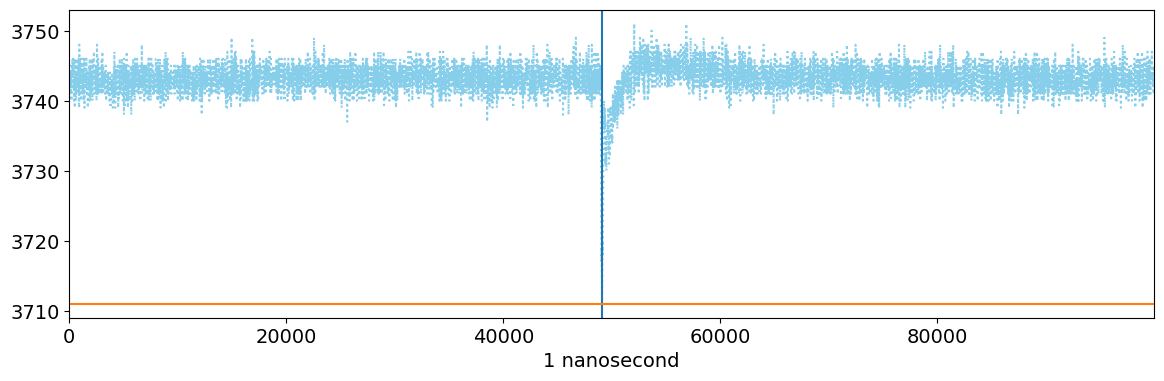

In [19]:
browser = WaveformBrowser(
    raw_examples[0][0],
    "S015/raw",
    dsp_config=dsp_config_file,
    lines=["waveform_bit_drop", "tp_min_small", "wf_min_small"],
    styles=[
        {"color": ["skyblue"], "ls": ["dotted"]},
    ],
)
browser.draw_entry(raw_examples[0][1][0])